# 13. Classification Task dengan Naive Bayes

Referensi: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

## Bayes' Theorem

Bayes' theorem menawarkan suatu formula untuk menghitung nilai probability dari suatu event dengan memanfaatkan pengetahuan sebelumnya dari kondisi terkait; atau sering kali dikenal dengan istilah conditional probability.

$P(y|X) = \frac {P(X|y)xP(y)} {P(X)}$

$Posterior = \frac {LikehoodxPrior} {Evidence}$

## Pengenalan Naive Bayes Classification

_Studi Kaus 1_

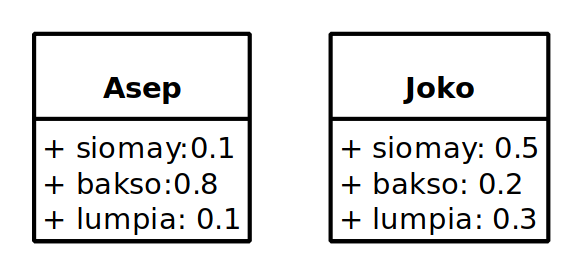

__Misi__: Lakukan prediksi siapa pelanggan yang melakukan pemesanan dengan diketahui pesanannya adalah __lumpia__ dan __bakso__.

Prior Probability: $P(y)$

- Refrensi : https://en.wikipedia.org/wiki/Prior_probability
- $P(Asep) = 0.5$
- $P(Joko) = 0.5$

_Likelihood:_ $P(X|y)$

- Referensi: https://en.wikipedia.org/wiki/Likelihood_function
- Asep: $$P(lumpia,bakso|Asep)=(0.1 \times 0.8) = 0.08$$
- Joko: $$P(lumpia,bakso|Joko)=(0.3 \times 0.2) = 0.06$$

_Evidence atau Normalizer:_ $P(X)$

$Evidence = \sum (likehood \times Prior)$
$P(lumpia, bakso) = (.0.8 \times 0.5) + (0.06 \times 0.5) = 0.07$

Posterior Probability : $P(y|X)$

- Referensi: https://en.wikipedia.org/wiki/Posterior_probability
- Formula: 
$Posterior = \frac {Likelihood \times Prior} {Evidence}$
- Asep: $P(Asep|lumpia,bakso) = \frac{0.08 \times 0.5}{0.07} = 0.57$
- Joko: $P(Joko|lumpia,bakso) = \frac{0.06 \times 0.5}{0.07} = 0.43$

_Studi Kaus 2_

__Misi__ : Lakukan prediksi siapa pelanggan yang melakukan pemesanan dengan diketahui pesanannya adalah __siomay__ dan __bakso__

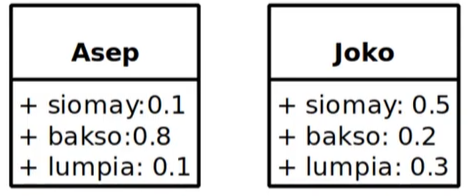

Posterior Probability : $P(y|X)$ (kasus 2)

- Pesanan: siomay, bakso
- Evidence: $P(X)$
$P(siomay, bakso)= (0.1\times0.8\times0.5) + (0.5\times0.2\times0.5) = 0.09$
- Asep:
$P(Asep|siomay, bakso)= \frac {(0.1\times0.8)\times0.5)} {0.09} = 0.444$
- Joko : 
$P(Joko|siomay, bakso)= \frac {(0.5\times0.2)\times0.5)} {0.09} = 0.555$

## Mengapa disebut Naive?

- Karena sewaktu kita mendefinisikan Likelihood $P(lumpia,bakso|Asep)$,
- kita mengasumsikan  conditionally independent terhadap ; $P(bakso|Asep)$; demikian sebaliknya.
- Sehingga dapat diformulasikan sebagai berikut

$P(lumpia, bakso|Asep) = P(lumpia|Asep) \times P(bakso|Asep)$

## Dataset: Breast Cancer Wisnonsin (Diagnostic)

Referensi: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [5]:
from sklearn.datasets import load_breast_cancer

print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
# load_breast_cancer?
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

## Trainning & Testing Set

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

print(f'x_train shape {x_train.shape}')
print(f'x_test shape {x_test.shape}')

x_train shape (455, 30)
x_test shape (114, 30)


## Naive Bayes dengan Scikit Learn

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9298245614035088

In [11]:
model.score(x_test, y_test)

0.9298245614035088

https://www.youtube.com/watch?v=Sj1ybuDDf9I Trs_m